# Data Visualization

Read me with the most important findings

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


### Table of Contents
<ul>
<li><a href="#pack">Importing packages</a></li>
<li><a href="#read">Reading data</a></li>
<li><a href="#assess">Assessing and cleaning the data</a></li>
<li><a href="#ins">Insights and visualizations part I</a></li>
<li><a href="#clean">Clean data after initial visualizations</a></li>
<li><a href="#instwo">Insights and visualizations part II</a></li>
</ul>

<a id='pack'></a>
# Importing Packages

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import datetime
from datetime import date
import time

import os
import glob

from geopy.distance import geodesic

%matplotlib inline

<a id='read'></a>
# Reading the data

The 2017 data has to be read seperately since it has one column less than the 2018 data

In [2]:
df_2017 = pd.read_csv('Data_sources/2017/2017-fordgobike-tripdata.csv')
df_2017.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male


Joining all csv files from the year 2018 into one dataframe

In [3]:
path = r'Data_sources/2018'
all_files = glob.glob(os.path.join(path, "*.csv"))

df_from_each_file = (pd.read_csv(f) for f in all_files)
df_2018 = pd.concat(df_from_each_file, ignore_index=True)

In [4]:
df_2018.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.40257,1035,Subscriber,1988.0,Male,No


<a id='assess'></a>
# Assessing and cleaning the data

### Assessing and cleaning 2017 data

In [5]:
df_2017_a = df_2017.copy()
df_2017_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [6]:
df_2017_a[df_2017_a.duplicated() == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender


<br>
__ Data Quality and Tidiness issues__
- Data Types have to be adjusted
- Missing Values for member_birth_year and member_gender
- Split start and end time in date and time
- Introduce a column called bike_share_for_all_trip to combine 2017 and 2018 data

<br>
__ 01_Define__ <br>
Data types have to be adjusted

__ Code __

In [7]:
# Duration_sec as foat
df_2017_a.duration_sec = df_2017_a.duration_sec.astype(float)

# Start_time and end_time as timestamp
df_2017_a.start_time = pd.to_datetime(df_2017_a['start_time'])
df_2017_a.end_time = pd.to_datetime(df_2017_a['end_time'])

# Start_station_id, end_station_id, bike_id as string
df_2017_a.start_station_id = df_2017_a.start_station_id.astype(str)
df_2017_a.end_station_id = df_2017_a.end_station_id.astype(str)
df_2017_a.bike_id = df_2017_a.bike_id.astype(str)

# Birthyear as string
df_2017_a.member_birth_year = df_2017_a.member_birth_year.astype(str)

<br>
__ Test __

In [8]:
df_2017_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null float64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
member_birth_year          519700 non-null object
member_gender              453238 non-null object
dtypes: datetime64[ns](2), float64(5), object(8)
memory usage: 59.5+ MB


<br>
__ 02_Define __ <br> 
Bike Share for All provides a one-time $5 annual membership for qualifying residents. The program also includes a cash payment option for those who do not have a debit or credit card. <br>

__ Assumption __ <br>
The programm was started in 2018. Therefore, all 2017 rides have a Bike Share for All "No"

__ Code __ 

In [9]:
df_2017_a['bike_share_for_all_trip'] = 'No'

__ Test __

In [10]:
df_2017_a.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80110.0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,No


<br>
__ 03_Define __ <br>
Split start_time and end_time into date and time

__ Code__

In [11]:
df_2017_a['start_date'] = df_2017_a['start_time'].apply(lambda time: time.strftime('%Y-%m-%d'))
df_2017_a['start_time_'] = df_2017_a['start_time'].apply(lambda time: time.strftime('%H:%M'))

df_2017_a['end_date'] = df_2017_a['end_time'].apply(lambda time: time.strftime('%Y-%m-%d'))
df_2017_a['end_time_'] = df_2017_a['end_time'].apply(lambda time: time.strftime('%H:%M'))

In [12]:
df_2017_a['start_date'] = pd.to_datetime(df_2017_a.start_date)

df_2017_a['end_date'] = pd.to_datetime(df_2017_a.end_date)

__ Test__

In [13]:
df_2017_a.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_
0,80110.0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,No,2017-12-31,16:57,2018-01-01,15:12


In [14]:
df_2017_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 20 columns):
duration_sec               519700 non-null float64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
member_birth_year          519700 non-null object
member_gender              453238 non-null object
bike_share_for_all_trip    519700 non-null object
start_date                 519700 non-null datetime64[ns]
start_time

<br>
### Assessing and cleaning the 2018 data

In [15]:
df_2018_a = df_2018.copy()
df_2018_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662263 entries, 0 to 1662262
Data columns (total 16 columns):
duration_sec               1662263 non-null int64
start_time                 1662263 non-null object
end_time                   1662263 non-null object
start_station_id           1651848 non-null float64
start_station_name         1651848 non-null object
start_station_latitude     1662263 non-null float64
start_station_longitude    1662263 non-null float64
end_station_id             1651848 non-null float64
end_station_name           1651848 non-null object
end_station_latitude       1662263 non-null float64
end_station_longitude      1662263 non-null float64
bike_id                    1662263 non-null int64
user_type                  1662263 non-null object
member_birth_year          1560199 non-null float64
member_gender              1560536 non-null object
bike_share_for_all_trip    1662263 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 202.9+ MB


In [16]:
df_2018_a[df_2018_a.duplicated() == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [17]:
df_2018_a[df_2018_a.start_station_name.isnull() == True].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
106718,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.42,-121.94,NaN,NaN,37.41,-121.94,4105,Customer,1982.0,Female,No
106976,392,2018-11-30 21:05:43.9400,2018-11-30 21:12:16.1520,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.94,4181,Subscriber,1987.0,Male,No
107137,366,2018-11-30 20:07:04.5700,2018-11-30 20:13:10.5990,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4181,Subscriber,1987.0,Male,No
107264,351,2018-11-30 19:27:46.8680,2018-11-30 19:33:38.4550,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4157,Subscriber,1977.0,Male,No
107593,309,2018-11-30 18:37:23.5710,2018-11-30 18:42:33.2340,NaN,NaN,37.38,-121.94,NaN,NaN,37.38,-121.93,4147,Subscriber,1994.0,Male,Yes


In [18]:
df_2018_a.bike_share_for_all_trip.unique()

array(['No', 'Yes'], dtype=object)

<br>
__ Data Quality and Tidiness issues__
- Data Types have to adjusted
- Missing values for start and end stations
- Split start and end time in date and time
- Missing values for member_birth_year and member_gender


<br>
__ 01_Define__ <br>
Data types have to be adjusted

__ Code __

In [19]:
# Duration_sec as foat
df_2018_a.duration_sec = df_2018_a.duration_sec.astype(float)

# Start_time and end_time as timestamp
df_2018_a.start_time = pd.to_datetime(df_2018_a['start_time'])
df_2018_a.end_time = pd.to_datetime(df_2018_a['end_time'])

# Start_station_id, end_station_id, bike_id as string
df_2018_a.start_station_id = df_2018_a.start_station_id.astype(str)
df_2018_a.end_station_id = df_2018_a.end_station_id.astype(str)
df_2018_a.bike_id = df_2018_a.bike_id.astype(str)

# Birthyear as string
df_2018_a.member_birth_year = df_2018_a.member_birth_year.astype(str)

__ Test __

In [20]:
df_2018_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662263 entries, 0 to 1662262
Data columns (total 16 columns):
duration_sec               1662263 non-null float64
start_time                 1662263 non-null datetime64[ns]
end_time                   1662263 non-null datetime64[ns]
start_station_id           1662263 non-null object
start_station_name         1651848 non-null object
start_station_latitude     1662263 non-null float64
start_station_longitude    1662263 non-null float64
end_station_id             1662263 non-null object
end_station_name           1651848 non-null object
end_station_latitude       1662263 non-null float64
end_station_longitude      1662263 non-null float64
bike_id                    1662263 non-null object
user_type                  1662263 non-null object
member_birth_year          1662263 non-null object
member_gender              1560536 non-null object
bike_share_for_all_trip    1662263 non-null object
dtypes: datetime64[ns](2), float64(5), object(9)
m

<br>
__ 02_Define __ <br>
Split start_time and end_time into date and time

__ Code __

In [21]:
df_2018_a['start_date'] = df_2018_a['start_time'].apply(lambda time: time.strftime('%Y-%m-%d'))
df_2018_a['start_time_'] = df_2018_a['start_time'].apply(lambda time: time.strftime('%H:%M'))

df_2018_a['end_date'] = df_2018_a['end_time'].apply(lambda time: time.strftime('%Y-%m-%d'))
df_2018_a['end_time_'] = df_2018_a['end_time'].apply(lambda time: time.strftime('%H:%M'))

In [22]:
df_2018_a['start_date'] = pd.to_datetime(df_2018_a.start_date)

df_2018_a['end_date'] = pd.to_datetime(df_2018_a.end_date)

__ Test __

In [23]:
df_2018_a.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_
0,598.0,2018-02-28 23:59:47.097,2018-03-01 00:09:45.187,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1035,Subscriber,1988.0,Male,No,2018-02-28,23:59,2018-03-01,00:09
1,943.0,2018-02-28 23:21:16.495,2018-02-28 23:36:59.974,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,1673,Customer,1987.0,Male,No,2018-02-28,23:21,2018-02-28,23:36
2,18587.0,2018-02-28 18:20:55.190,2018-02-28 23:30:42.925,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3498,Customer,1986.0,Female,No,2018-02-28,18:20,2018-02-28,23:30
3,18558.0,2018-02-28 18:20:53.621,2018-02-28 23:30:12.450,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,3129,Customer,1981.0,Male,No,2018-02-28,18:20,2018-02-28,23:30
4,885.0,2018-02-28 23:15:12.858,2018-02-28 23:29:58.608,308.0,San Pedro Square,37.336802,-121.894090,297.0,Locust St at Grant St,37.322980,-121.887931,1839,Subscriber,1976.0,Female,Yes,2018-02-28,23:15,2018-02-28,23:29


In [24]:
df_2018_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1662263 entries, 0 to 1662262
Data columns (total 20 columns):
duration_sec               1662263 non-null float64
start_time                 1662263 non-null datetime64[ns]
end_time                   1662263 non-null datetime64[ns]
start_station_id           1662263 non-null object
start_station_name         1651848 non-null object
start_station_latitude     1662263 non-null float64
start_station_longitude    1662263 non-null float64
end_station_id             1662263 non-null object
end_station_name           1651848 non-null object
end_station_latitude       1662263 non-null float64
end_station_longitude      1662263 non-null float64
bike_id                    1662263 non-null object
user_type                  1662263 non-null object
member_birth_year          1662263 non-null object
member_gender              1560536 non-null object
bike_share_for_all_trip    1662263 non-null object
start_date                 1662263 non-null dateti

<br>
### Combining 2017 and 2018 data

<br>
__ Define __ <br>
Combine the 2018 and 2017 data from the df_2017_a and df_2018_a dataframes

__ Code __

Check if the columns are the same for the two dataframes

In [25]:
df_2017_a.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_date', 'start_time_', 'end_date', 'end_time_'],
      dtype='object')

In [26]:
df_2018_a.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_date', 'start_time_', 'end_date', 'end_time_'],
      dtype='object')

In [27]:
df_2017_a.columns == df_2018_a.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

<br>
Combine the dataframes

In [28]:
frames = [df_2017_a, df_2018_a]

df = pd.concat(frames)

In [29]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_
0,80110.0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male,No,2017-12-31,16:57,2018-01-01,15:12


In [30]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181963 entries, 0 to 1662262
Data columns (total 20 columns):
duration_sec               2181963 non-null float64
start_time                 2181963 non-null datetime64[ns]
end_time                   2181963 non-null datetime64[ns]
start_station_id           2181963 non-null object
start_station_name         2171548 non-null object
start_station_latitude     2181963 non-null float64
start_station_longitude    2181963 non-null float64
end_station_id             2181963 non-null object
end_station_name           2171548 non-null object
end_station_latitude       2181963 non-null float64
end_station_longitude      2181963 non-null float64
bike_id                    2181963 non-null object
user_type                  2181963 non-null object
member_birth_year          2181963 non-null object
member_gender              2013774 non-null object
bike_share_for_all_trip    2181963 non-null object
start_date                 2181963 non-null dateti

__ Test __

Test if all the rows were combined correctly

In [31]:
df_2017_a.duration_sec.count(), df_2018_a.duration_sec.count(), df.duration_sec.count()

(519700, 1662263, 2181963)

In [32]:
df_2017_a.duration_sec.count() + df_2018_a.duration_sec.count() == df.duration_sec.count()

True

Reset index to make the following analysis possible

In [33]:
df.reset_index(drop = True, inplace = True)

<br>
__ Data Quality and Tidiness issues__
- Duration in minutes and hours
- Calculate the distance between the start and end point of the bike drive
- Drop unnecessary columns
- Remove the .0 form the member birth year
- Change data type of start and end datae

<br>
__ 01_Define__<br>
Add two more columns with the duration in minutes and hours

__ Code__

In [34]:
df['duration_minutes'] = df.duration_sec / 60
df['duration_hours'] = df.duration_sec / 3600

__ Test__

In [35]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_,duration_minutes,duration_hours
0,80110.0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Customer,1987.0,Male,No,2017-12-31,16:57,2018-01-01,15:12,1335.166667,22.252778


In [36]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181963 entries, 0 to 2181962
Data columns (total 22 columns):
duration_sec               2181963 non-null float64
start_time                 2181963 non-null datetime64[ns]
end_time                   2181963 non-null datetime64[ns]
start_station_id           2181963 non-null object
start_station_name         2171548 non-null object
start_station_latitude     2181963 non-null float64
start_station_longitude    2181963 non-null float64
end_station_id             2181963 non-null object
end_station_name           2171548 non-null object
end_station_latitude       2181963 non-null float64
end_station_longitude      2181963 non-null float64
bike_id                    2181963 non-null object
user_type                  2181963 non-null object
member_birth_year          2181963 non-null object
member_gender              2013774 non-null object
bike_share_for_all_trip    2181963 non-null object
start_date                 2181963 non-null dateti

__ 02_Define __ <br>
The distance between starting point and ending point can be calculated based on the latitute and longitute. The distance is calculated with the library geopy which uses the following order for latitude and longitude (location.latitude, location.longitude)

__ Code __

In [37]:
# Build a timer
timer = np.arange(1,101,1)
timer

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [38]:
# This calculation takes a while
distances = []
for i in range(df.shape[0]):
    length = geodesic((df.start_station_latitude[i], df.start_station_longitude[i]),(df.end_station_latitude[i], df.end_station_longitude[i])).miles
    distances.append(length)
    if i / 25000 in timer:
        print ('Current progress: {}'.format(i))

Current progress: 25000
Current progress: 50000
Current progress: 75000
Current progress: 100000
Current progress: 125000
Current progress: 150000
Current progress: 175000
Current progress: 200000
Current progress: 225000
Current progress: 250000
Current progress: 275000
Current progress: 300000
Current progress: 325000
Current progress: 350000
Current progress: 375000
Current progress: 400000
Current progress: 425000
Current progress: 450000
Current progress: 475000
Current progress: 500000
Current progress: 525000
Current progress: 550000
Current progress: 575000
Current progress: 600000
Current progress: 625000
Current progress: 650000
Current progress: 675000
Current progress: 700000
Current progress: 725000
Current progress: 750000
Current progress: 775000
Current progress: 800000
Current progress: 825000
Current progress: 850000
Current progress: 875000
Current progress: 900000
Current progress: 925000
Current progress: 950000
Current progress: 975000
Current progress: 1000000
Cu

In [39]:
# Build a new column with the distances
df['distance'] = distances

In [40]:
# One mile equlas 1609.34 meters
df['distance'] = df['distance'] * 1609.34

__ Test __

In [41]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_,duration_minutes,duration_hours,distance
0,80110.0,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,...,1987.0,Male,No,2017-12-31,16:57,2018-01-01,15:12,1335.166667,22.252778,944.87377


In [42]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181963 entries, 0 to 2181962
Data columns (total 23 columns):
duration_sec               2181963 non-null float64
start_time                 2181963 non-null datetime64[ns]
end_time                   2181963 non-null datetime64[ns]
start_station_id           2181963 non-null object
start_station_name         2171548 non-null object
start_station_latitude     2181963 non-null float64
start_station_longitude    2181963 non-null float64
end_station_id             2181963 non-null object
end_station_name           2171548 non-null object
end_station_latitude       2181963 non-null float64
end_station_longitude      2181963 non-null float64
bike_id                    2181963 non-null object
user_type                  2181963 non-null object
member_birth_year          2181963 non-null object
member_gender              2013774 non-null object
bike_share_for_all_trip    2181963 non-null object
start_date                 2181963 non-null dateti

<br>
__ 03_Define __ <br>
Copy dataframe, drop unnecessary columns and save the dataframe for the following analysis

__Code__

In [43]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_date', 'start_time_', 'end_date', 'end_time_',
       'duration_minutes', 'duration_hours', 'distance'],
      dtype='object')

In [44]:
dfcopy = df.copy()

In [45]:
dfcopy.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181963 entries, 0 to 2181962
Data columns (total 23 columns):
duration_sec               2181963 non-null float64
start_time                 2181963 non-null datetime64[ns]
end_time                   2181963 non-null datetime64[ns]
start_station_id           2181963 non-null object
start_station_name         2171548 non-null object
start_station_latitude     2181963 non-null float64
start_station_longitude    2181963 non-null float64
end_station_id             2181963 non-null object
end_station_name           2171548 non-null object
end_station_latitude       2181963 non-null float64
end_station_longitude      2181963 non-null float64
bike_id                    2181963 non-null object
user_type                  2181963 non-null object
member_birth_year          2181963 non-null object
member_gender              2013774 non-null object
bike_share_for_all_trip    2181963 non-null object
start_date                 2181963 non-null dateti

In [46]:
dfcopy.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude',
        'duration_sec', 'duration_hours', 'start_time', 'end_time'], 
        inplace = True, axis = 1)

__ Test __

In [47]:
dfcopy.columns

Index(['start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip', 'start_date', 'start_time_',
       'end_date', 'end_time_', 'duration_minutes', 'distance'],
      dtype='object')

In [48]:
dfcopy.head(1)

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_,duration_minutes,distance
0,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,1987.0,Male,No,2017-12-31,16:57,2018-01-01,15:12,1335.166667,944.87377


<br>
__Save the data__

In [49]:
dfcopy.to_csv('cleaned_dataframe.csv', index = False)

In [50]:
# pickle saves dataframe inkluding the data type information etc.
dfcopy.to_pickle('cleaned_dataframe.pkl')

<a id='ins'></a>
# Insights and visualizations part I

__ Different univatiate plots __ 
- Duration distribution (minutes)
- Distance distribution
- Start and end station distribution
- Bike id distribution
- Member birth year and gender distribution
- Rides over time

<br>
__ Import dataframe __

In [51]:
dfc = pd.read_pickle('cleaned_dataframe.pkl')

In [52]:
dfc.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181963 entries, 0 to 2181962
Data columns (total 15 columns):
start_station_id           2181963 non-null object
start_station_name         2171548 non-null object
end_station_id             2181963 non-null object
end_station_name           2171548 non-null object
bike_id                    2181963 non-null object
user_type                  2181963 non-null object
member_birth_year          2181963 non-null object
member_gender              2013774 non-null object
bike_share_for_all_trip    2181963 non-null object
start_date                 2181963 non-null datetime64[ns]
start_time_                2181963 non-null object
end_date                   2181963 non-null datetime64[ns]
end_time_                  2181963 non-null object
duration_minutes           2181963 non-null float64
distance                   2181963 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 249.7+ MB


In [53]:
dfc.head(1)

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_,duration_minutes,distance
0,74,Laguna St at Hayes St,43,San Francisco Public Library (Grove St at Hyde...,96,Customer,1987.0,Male,No,2017-12-31,16:57,2018-01-01,15:12,1335.166667,944.87377


<br>
Plotting style depending on the background

In [54]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [55]:
# plt.style.use(['dark_background'])
# plt.style.use(['seaborn-notebook'])
# plt.style.use(['ggplot'])

__ 01_ Duration distribution__

In [56]:
bin_edges_01 = np.arange(0, dfc['duration_minutes'].max()+5, 5)

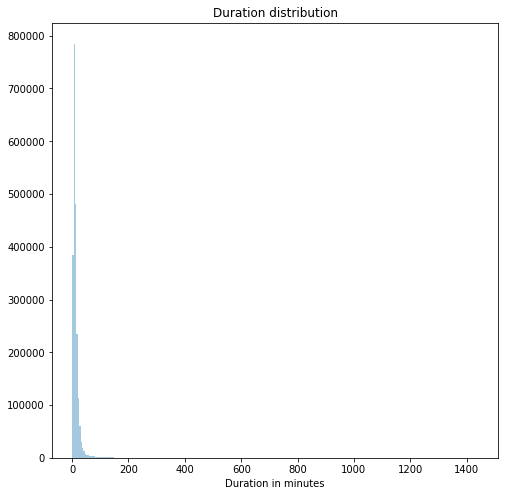

In [57]:
plt.figure(figsize = (8,8))

sb.distplot(dfc['duration_minutes'], bins = bin_edges_01, kde = False)

plt.title('Duration distribution')
plt.xlabel('Duration in minutes');

Seems there are many outliers in the duration distribution. Therefore, a limit is set.

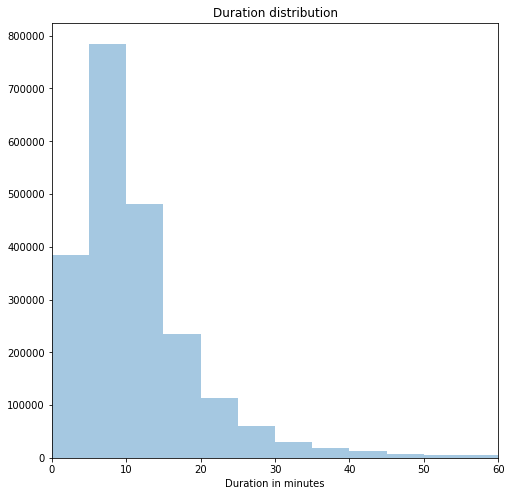

In [58]:
plt.figure(figsize = (8,8))

sb.distplot(dfc['duration_minutes'], bins = bin_edges_01, kde = False)

plt.xlim(0,60)

plt.title('Duration distribution')
plt.xlabel('Duration in minutes');

__ Conclusion: __
The duration distribution is highly right skewed!
> The data has be be cleaned for the outliers before further analysis

<br>
__02_Distance distribution__

In [59]:
bin_edges_02 = np.arange(0, dfc['distance'].max()+1000, 1000)
bin_edges_02

array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
        8000.,  9000., 10000., 11000., 12000., 13000., 14000., 15000.,
       16000., 17000., 18000., 19000., 20000., 21000., 22000., 23000.,
       24000., 25000., 26000., 27000., 28000., 29000., 30000., 31000.,
       32000., 33000., 34000., 35000., 36000., 37000., 38000., 39000.,
       40000., 41000., 42000., 43000., 44000., 45000., 46000., 47000.,
       48000., 49000., 50000., 51000., 52000., 53000., 54000., 55000.,
       56000., 57000., 58000., 59000., 60000., 61000., 62000., 63000.,
       64000., 65000., 66000., 67000., 68000., 69000.])

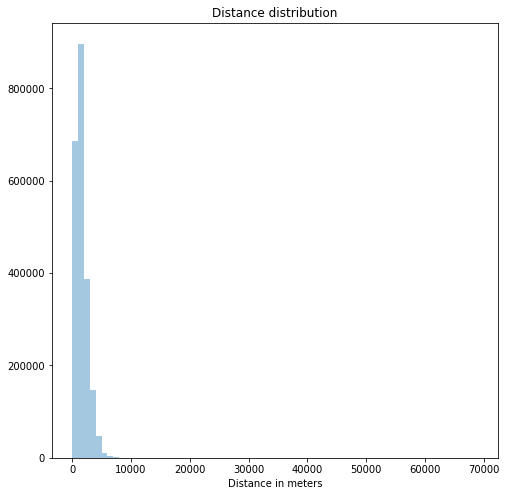

In [60]:
plt.figure(figsize = (8,8))

sb.distplot(dfc['distance'], bins = bin_edges_02, kde = False)

plt.title('Distance distribution')
plt.xlabel('Distance in meters');

Seems like there are some outliers. Therefore, a limit is set.

In [61]:
dfc['distance'].max()

68196.25331284529

Bin_edges have to be calculated newly since the bin edges above were used because of the outliers

In [62]:
bin_edges_02_1 = np.arange(0, dfc['distance'].max()+1000, 200)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


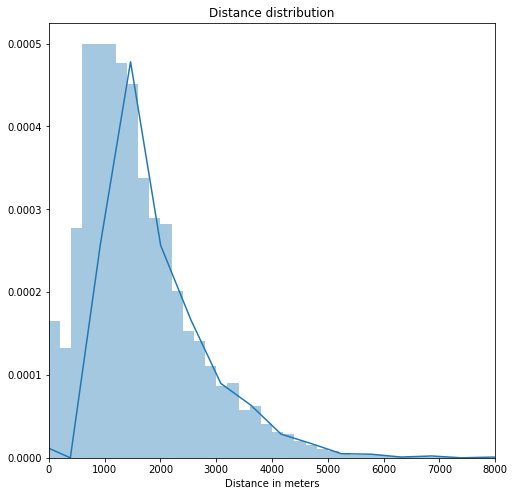

In [63]:
plt.figure(figsize = (8,8))

sb.distplot(dfc['distance'], bins = bin_edges_02_1, kde = True)

plt.xlim(0,8000)

plt.title('Distance distribution')
plt.xlabel('Distance in meters');

__ Conclusion: __ The most distances are in about 1 km drives. 

> The data has be be cleaned for the outliers before further analysis

<br>
__03_Start and end station distribution __

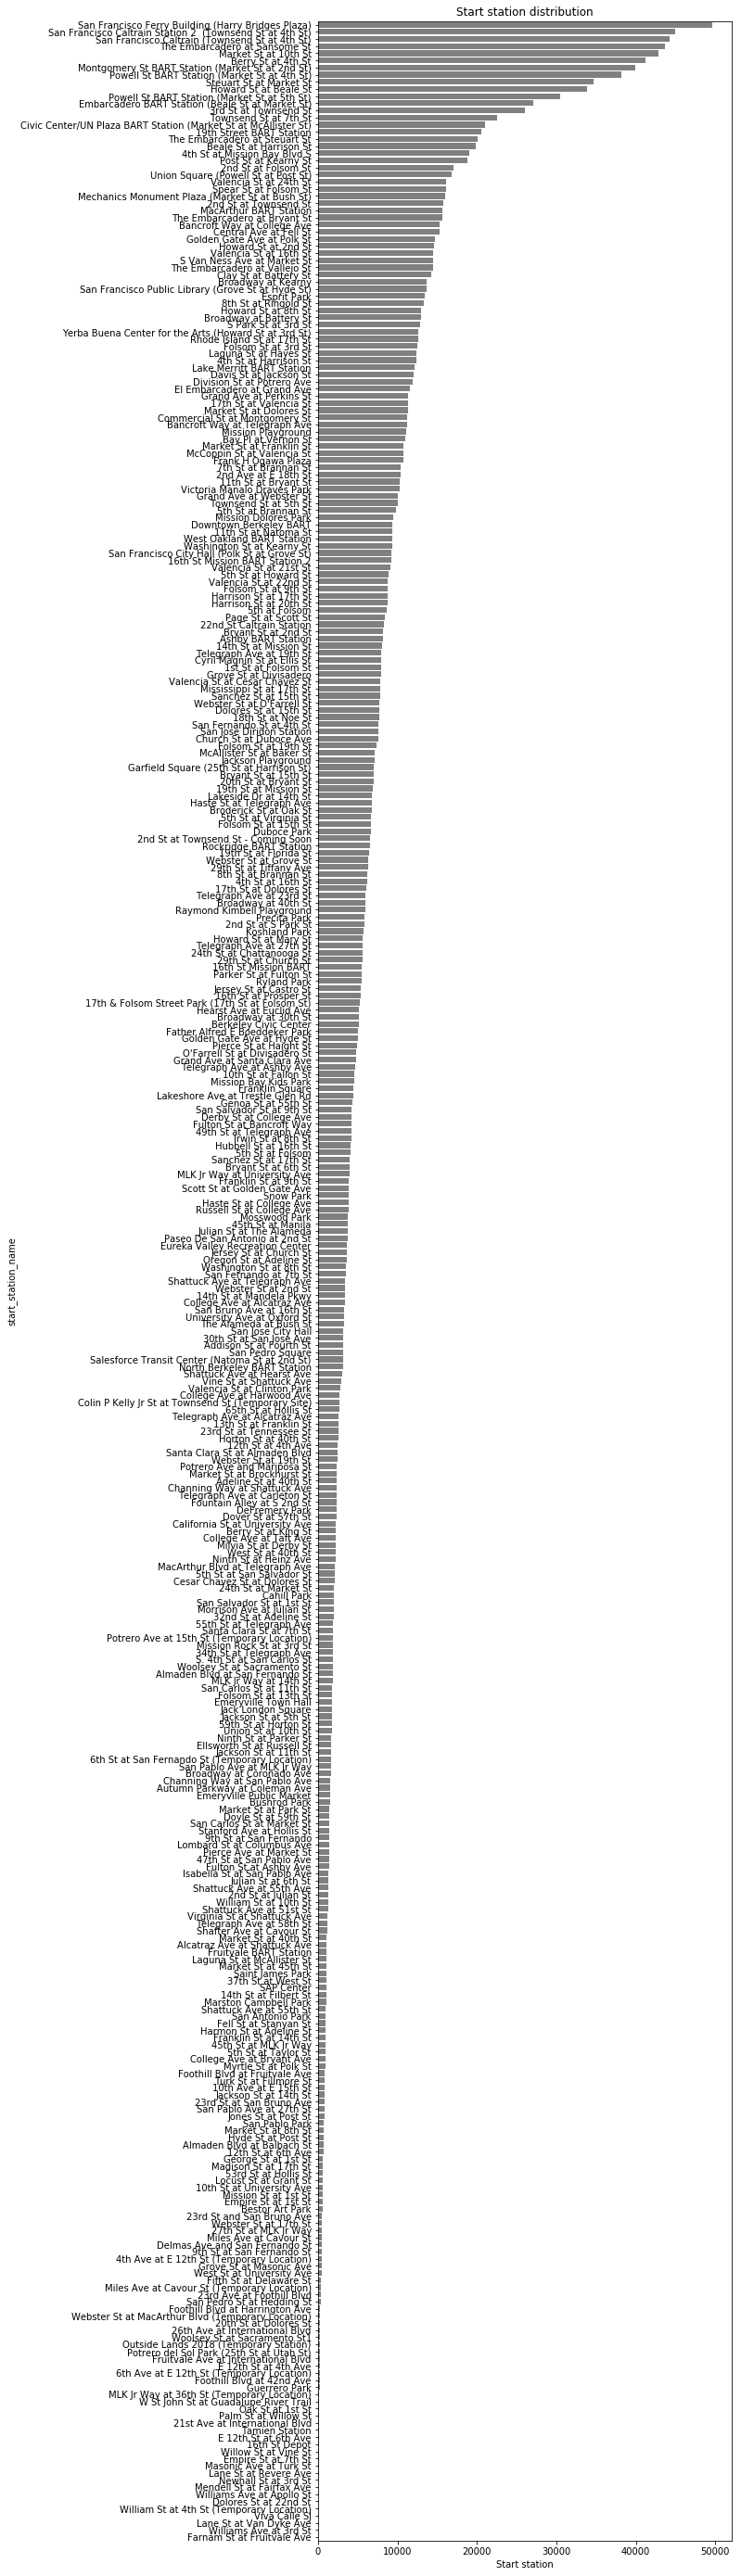

In [64]:
plt.figure(figsize = (8,50))

sb.countplot(data = dfc, y = 'start_station_name', color = 'grey', order = dfc.start_station_name.value_counts().index)

plt.title('Start station distribution')
plt.xlabel('Start station');

In [65]:
dfc.start_station_name.value_counts().head(50)

San Francisco Ferry Building (Harry Bridges Plaza)                 49617
San Francisco Caltrain Station 2  (Townsend St at 4th St)          44960
San Francisco Caltrain (Townsend St at 4th St)                     44242
The Embarcadero at Sansome St                                      43634
Market St at 10th St                                               42795
Berry St at 4th St                                                 41205
Montgomery St BART Station (Market St at 2nd St)                   39981
Powell St BART Station (Market St at 4th St)                       38160
Steuart St at Market St                                            34689
Howard St at Beale St                                              33827
Powell St BART Station (Market St at 5th St)                       30467
Embarcadero BART Station (Beale St at Market St)                   27141
3rd St at Townsend St                                              26076
Townsend St at 7th St                              

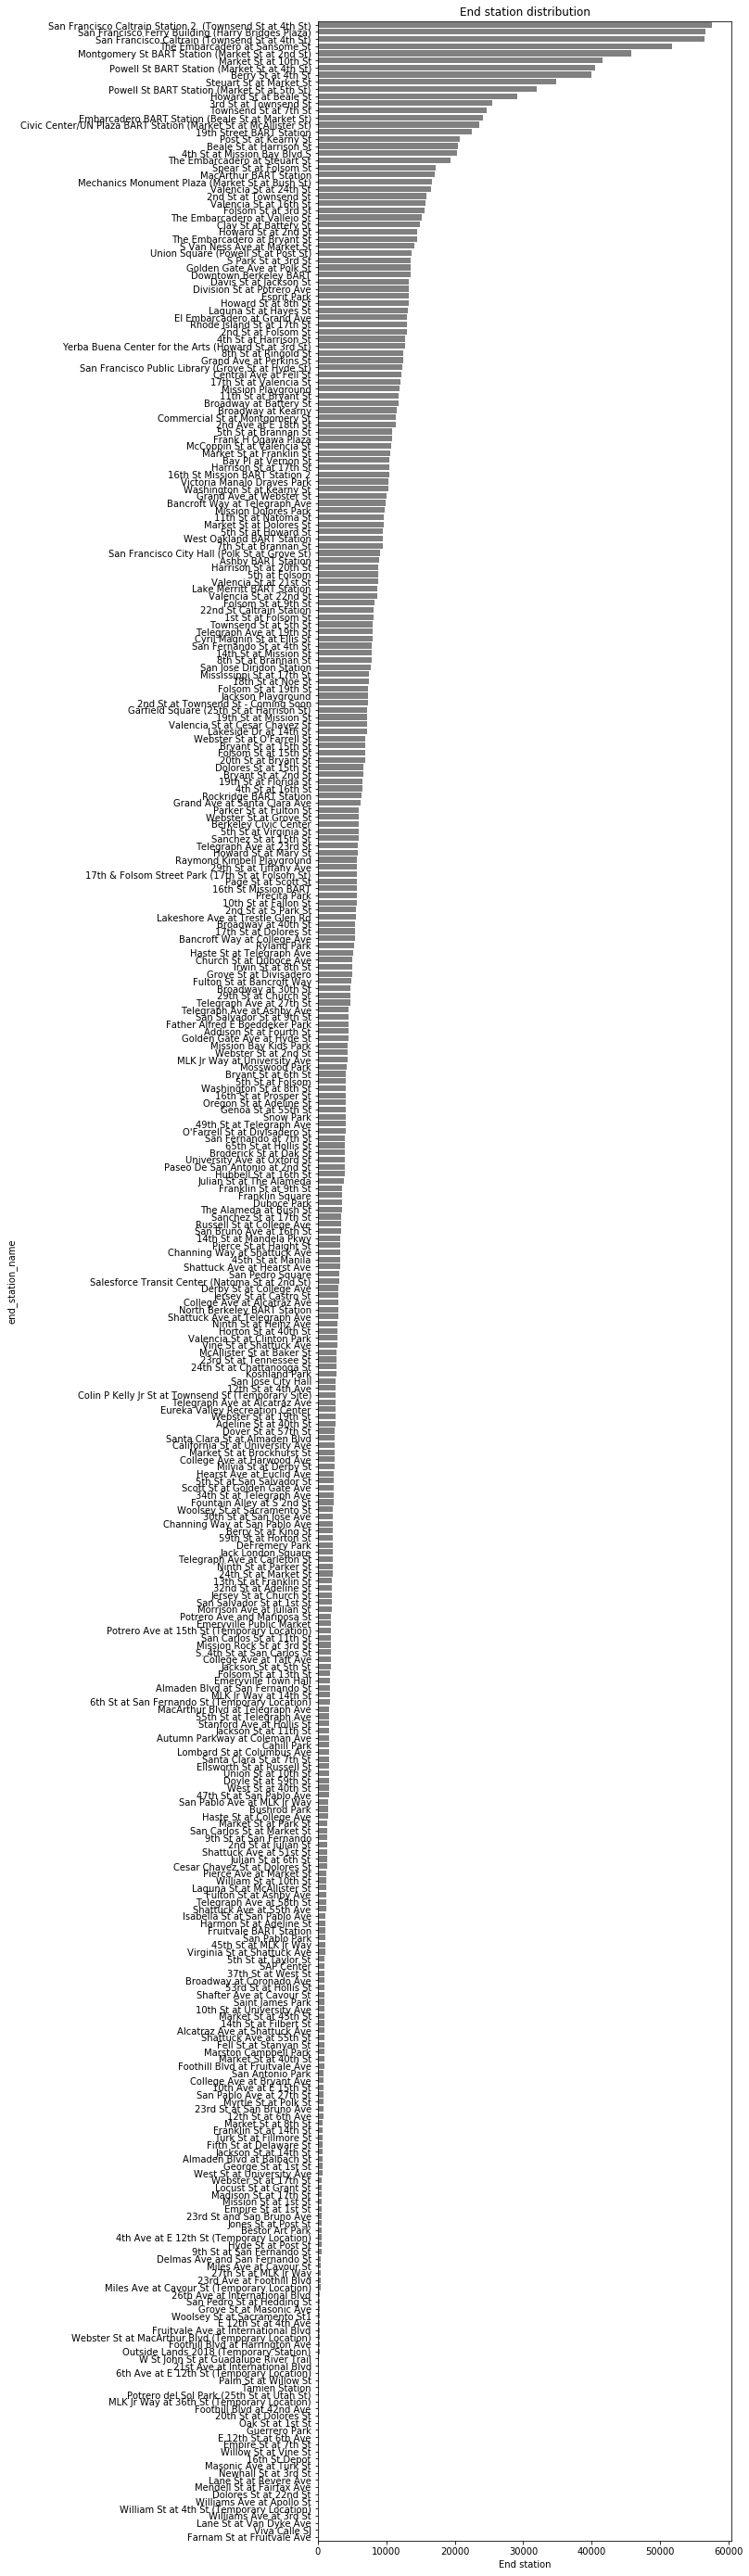

In [66]:
plt.figure(figsize = (8,50))

sb.countplot(data = dfc, y = 'end_station_name', color = 'grey', order = dfc.end_station_name.value_counts().index)

plt.title('End station distribution')
plt.xlabel('End station');

In [67]:
dfc.end_station_name.value_counts().head(50)

San Francisco Caltrain Station 2  (Townsend St at 4th St)          57549
San Francisco Ferry Building (Harry Bridges Plaza)                 56588
San Francisco Caltrain (Townsend St at 4th St)                     56492
The Embarcadero at Sansome St                                      51793
Montgomery St BART Station (Market St at 2nd St)                   45735
Market St at 10th St                                               41583
Powell St BART Station (Market St at 4th St)                       40460
Berry St at 4th St                                                 39947
Steuart St at Market St                                            34761
Powell St BART Station (Market St at 5th St)                       31977
Howard St at Beale St                                              29145
3rd St at Townsend St                                              25467
Townsend St at 7th St                                              24712
Embarcadero BART Station (Beale St at Market St)   

__ Conclustion: __ Most of the drives seem to be start and end on connecting places like the BART or Caltrain stations. A more detailed investigation for these stations and also a more detailed overview about the individual stations and the number of drives between them should be done in San Francisco to figure out the most important routes. However this will not be done in this workbook any more. There is (I think) better software for that.

<br>
__04_Bike id distribution __

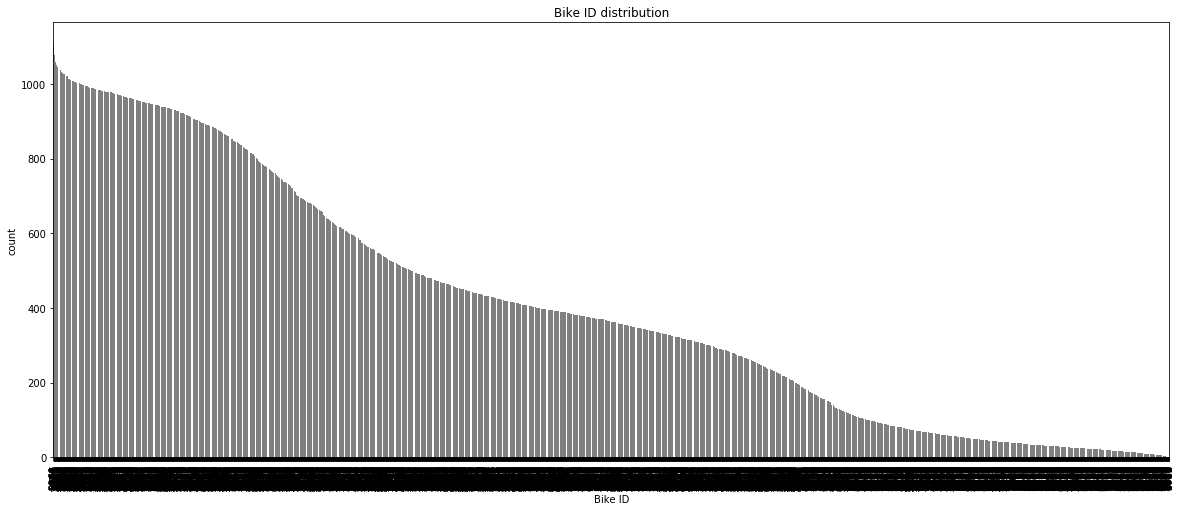

In [68]:
plt.figure(figsize = (20,8))

sb.countplot(data = dfc, x = 'bike_id', color = 'grey', order = dfc.bike_id.value_counts().index)

plt.title('Bike ID distribution')
plt.xlabel('')
plt.xticks(rotation=90)
plt.xlabel('Bike ID');

__ Conclusion: __ The utilization rate of the bikes is most probably highly dependen on the pllaces the bikes are. Therefore, bikes with a hihger utilization has to be maintained more often.

<br>
__ 05_Member birth year and gender distribution __

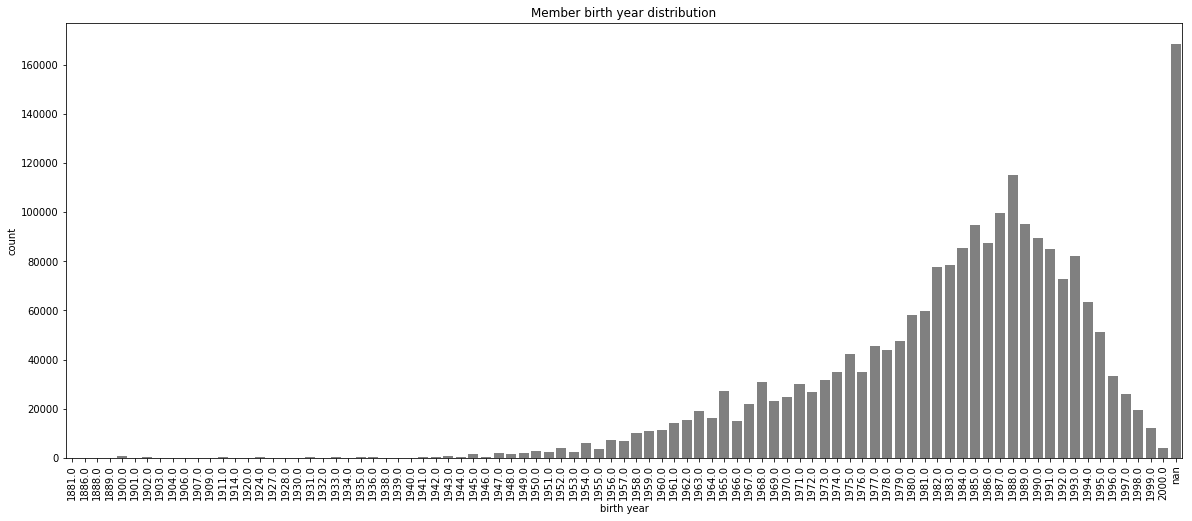

In [69]:
plt.figure(figsize = (20,8))

sb.countplot(data = dfc, x = 'member_birth_year', color = 'grey')

plt.title('Member birth year distribution')
plt.xticks(rotation=90)
plt.xlabel('birth year');

This data set sould also be cleaned for the members that were born before 1950 because they would be about 70 years today.

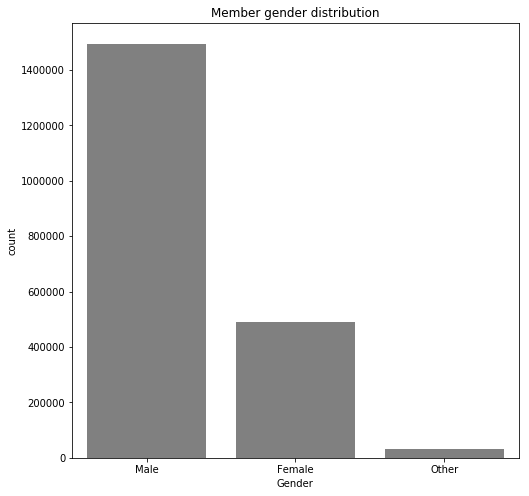

In [70]:
plt.figure(figsize = (8,8))

sb.countplot(data = dfc, x = 'member_gender', color = 'grey')

plt.title('Member gender distribution')
plt.xlabel('Gender');

__ Conclusion: __ Apparently more male than female use the bike service. The age distribution is slighly shifted towards younger people.

<br>
__06_Rides over time__

In [71]:
dfc.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181963 entries, 0 to 2181962
Data columns (total 15 columns):
start_station_id           2181963 non-null object
start_station_name         2171548 non-null object
end_station_id             2181963 non-null object
end_station_name           2171548 non-null object
bike_id                    2181963 non-null object
user_type                  2181963 non-null object
member_birth_year          2181963 non-null object
member_gender              2013774 non-null object
bike_share_for_all_trip    2181963 non-null object
start_date                 2181963 non-null datetime64[ns]
start_time_                2181963 non-null object
end_date                   2181963 non-null datetime64[ns]
end_time_                  2181963 non-null object
duration_minutes           2181963 non-null float64
distance                   2181963 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 249.7+ MB


New column with month and year is nessecary to aggregate on a monthly level

In [72]:
dfc['year'] = pd.DatetimeIndex(dfc['start_date']).year
dfc['month'] = pd.DatetimeIndex(dfc['start_date']).month
dfc['year'] = dfc['year']
dfc['month'] = dfc['month']
dfc['year_and_month'] = dfc['year'].astype(str) +'-'+ dfc['month'].astype(str)
dfc['year_and_month'] = pd.to_datetime(dfc['year_and_month'])

Drop unnessecary columns

In [73]:
dfc.drop(['month', 'year'], axis = 1, inplace = True)

Use the start_date as time

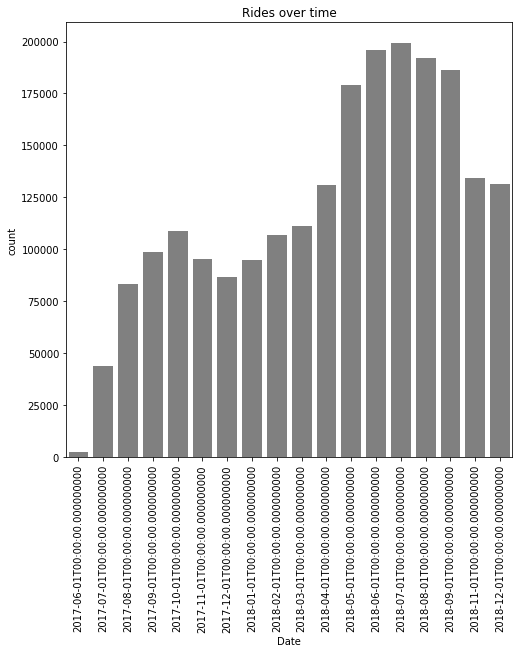

In [74]:
plt.figure(figsize = (8,8))

plt.figure(1)
sb.countplot(data = dfc, x = 'year_and_month', color = 'grey')

plt.title('Rides over time')
plt.xticks(rotation=90)
plt.xlabel('Date');

__ Conclusion: __ There is an incrase due to the time of operation of the service. Moreover in the summer months more rides are conducted.

<br>
__ Different bivariate plots __ 
- Correlation plots


__ 07_Duration and distance scatterplot __

In [75]:
dfc[['distance', 'duration_minutes']].info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181963 entries, 0 to 2181962
Data columns (total 2 columns):
distance            2181963 non-null float64
duration_minutes    2181963 non-null float64
dtypes: float64(2)
memory usage: 33.3 MB


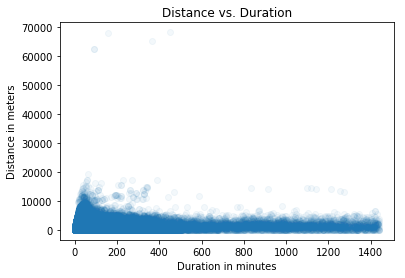

In [76]:
plt.scatter(data = dfc, x = 'duration_minutes', y = 'distance', alpha = 1/20)

plt.title('Distance vs. Duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Distance in meters');

__ Conclusion: __ It seems there is no correlation between distance and duration. Although, outliers are making an analysis difficult

<a id='clean'></a>
# Clean data after initial visualizations

<br>
__ Clean the data __ 
- Remove duration outliers
- Remove distance outliers
- Clean for missing values

Copy dataframe

In [77]:
dfc = pd.read_pickle('cleaned_dataframe.pkl')

In [78]:
dfcc = dfc.copy()

In [79]:
dfcc.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181963 entries, 0 to 2181962
Data columns (total 15 columns):
start_station_id           2181963 non-null object
start_station_name         2171548 non-null object
end_station_id             2181963 non-null object
end_station_name           2171548 non-null object
bike_id                    2181963 non-null object
user_type                  2181963 non-null object
member_birth_year          2181963 non-null object
member_gender              2013774 non-null object
bike_share_for_all_trip    2181963 non-null object
start_date                 2181963 non-null datetime64[ns]
start_time_                2181963 non-null object
end_date                   2181963 non-null datetime64[ns]
end_time_                  2181963 non-null object
duration_minutes           2181963 non-null float64
distance                   2181963 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 249.7+ MB


<br>
__ 01_Define __ <br>
Remove duration outliers from the dataset

__ Code__

In [80]:
dfcc.duration_minutes.describe()

count    2.181963e+06
mean     1.532807e+01
std      4.499705e+01
min      1.016667e+00
25%      5.950000e+00
50%      9.416667e+00
75%      1.480000e+01
max      1.439483e+03
Name: duration_minutes, dtype: float64

Calculate the IQR and mean

In [81]:
q75_dur, q25_dur = np.percentile(dfcc.duration_minutes, [75 ,25])
iqr_dur = q75_dur - q25_dur
mean_dur = dfcc.duration_minutes.mean()
iqr_dur, mean_dur

(8.850000000000001, 15.328066317654054)

Remove all outliers greater than 2x IQR

In [82]:
limit_dur = mean_dur + 2 * iqr_dur
limit_dur

33.02806631765406

Overview about the remaining data

In [83]:
dfcc.duration_minutes[dfcc.duration_minutes < limit_dur].count(), dfcc.duration_minutes.count(), dfcc.duration_minutes[dfc.duration_minutes < limit_dur].count() / dfc.duration_minutes.count()

(2079974, 2181963, 0.9532581441573482)

Remove outliers

In [84]:
dfcc = dfcc[dfcc.duration_minutes < limit_dur]
dfcc.reset_index(inplace = True, drop = True)

__ Test __

In [85]:
dfcc.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079974 entries, 0 to 2079973
Data columns (total 15 columns):
start_station_id           2079974 non-null object
start_station_name         2071102 non-null object
end_station_id             2079974 non-null object
end_station_name           2071102 non-null object
bike_id                    2079974 non-null object
user_type                  2079974 non-null object
member_birth_year          2079974 non-null object
member_gender              1949101 non-null object
bike_share_for_all_trip    2079974 non-null object
start_date                 2079974 non-null datetime64[ns]
start_time_                2079974 non-null object
end_date                   2079974 non-null datetime64[ns]
end_time_                  2079974 non-null object
duration_minutes           2079974 non-null float64
distance                   2079974 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 238.0+ MB


In [86]:
dfcc.head(1)

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_,duration_minutes,distance
0,14,Clay St at Battery St,27,Beale St at Harrison St,558,Subscriber,1980.0,Female,No,2017-12-31,23:53,2018-01-01,00:19,25.733333,1050.379422


<br>
__ 02_Define __ <br>
Remove distance outliers from the dataset

__ Code __

In [87]:
dfcc.distance.describe()

count    2.079974e+06
mean     1.583453e+03
std      9.733685e+02
min      0.000000e+00
25%      8.860449e+02
50%      1.378911e+03
75%      2.073876e+03
max      1.331256e+04
Name: distance, dtype: float64

In [88]:
q75_dis, q25_dis = np.percentile(dfcc.distance, [75 ,25])
iqr_dis = q75_dis - q25_dis
mean_dis = dfcc.distance.mean()
iqr_dis, mean_dis

(1187.8314887919946, 1583.4532326798203)

Remove all outliers greater than 2x IQR

In [89]:
limit_dis = mean_dis + 2 * iqr_dis
limit_dis

3959.1162102638095

Overview about the remaining data

In [90]:
dfcc.distance[dfcc.distance < limit_dis].count(), dfcc.distance.count(), dfcc.distance[dfc.distance < limit_dis].count() / dfc.distance.count()

(2023867, 2079974, 0.9241100788601824)

In [91]:
dfcc = dfcc[dfcc.distance < limit_dis]
dfcc.reset_index(inplace = True, drop = True)

__Test__

In [92]:
dfcc.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023867 entries, 0 to 2023866
Data columns (total 15 columns):
start_station_id           2023867 non-null object
start_station_name         2015099 non-null object
end_station_id             2023867 non-null object
end_station_name           2015099 non-null object
bike_id                    2023867 non-null object
user_type                  2023867 non-null object
member_birth_year          2023867 non-null object
member_gender              1895798 non-null object
bike_share_for_all_trip    2023867 non-null object
start_date                 2023867 non-null datetime64[ns]
start_time_                2023867 non-null object
end_date                   2023867 non-null datetime64[ns]
end_time_                  2023867 non-null object
duration_minutes           2023867 non-null float64
distance                   2023867 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 231.6+ MB


<br>
__ 03_Define __ <br>
Clean for missing values

__ Code __

In [93]:
dfcc.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023867 entries, 0 to 2023866
Data columns (total 15 columns):
start_station_id           2023867 non-null object
start_station_name         2015099 non-null object
end_station_id             2023867 non-null object
end_station_name           2015099 non-null object
bike_id                    2023867 non-null object
user_type                  2023867 non-null object
member_birth_year          2023867 non-null object
member_gender              1895798 non-null object
bike_share_for_all_trip    2023867 non-null object
start_date                 2023867 non-null datetime64[ns]
start_time_                2023867 non-null object
end_date                   2023867 non-null datetime64[ns]
end_time_                  2023867 non-null object
duration_minutes           2023867 non-null float64
distance                   2023867 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 231.6+ MB


Drop all data with missing values

In [94]:
dfcc.dropna(inplace = True)
dfcc.reset_index(drop = True, inplace = True)

__ Test __

In [95]:
dfcc.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887258 entries, 0 to 1887257
Data columns (total 15 columns):
start_station_id           1887258 non-null object
start_station_name         1887258 non-null object
end_station_id             1887258 non-null object
end_station_name           1887258 non-null object
bike_id                    1887258 non-null object
user_type                  1887258 non-null object
member_birth_year          1887258 non-null object
member_gender              1887258 non-null object
bike_share_for_all_trip    1887258 non-null object
start_date                 1887258 non-null datetime64[ns]
start_time_                1887258 non-null object
end_date                   1887258 non-null datetime64[ns]
end_time_                  1887258 non-null object
duration_minutes           1887258 non-null float64
distance                   1887258 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 216.0+ MB


Calculate the data that was removed

In [96]:
dfcc.start_station_id.count() / dfc.start_station_id.count()

0.8649358398836278

More than 86% of the original data is still in the dataframe

In [97]:
# pickle saves dataframe inkluding the data type information etc.
dfcc.to_pickle('cleaned_dataframe2.pkl')

<a id='instwo'></a>
# Insights and visualizations part II

<br>
__ Different bivariate plots __ 
- Correlation plots

In [98]:
dfcc = pd.read_pickle('cleaned_dataframe2.pkl')

In [99]:
dfcc.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887258 entries, 0 to 1887257
Data columns (total 15 columns):
start_station_id           1887258 non-null object
start_station_name         1887258 non-null object
end_station_id             1887258 non-null object
end_station_name           1887258 non-null object
bike_id                    1887258 non-null object
user_type                  1887258 non-null object
member_birth_year          1887258 non-null object
member_gender              1887258 non-null object
bike_share_for_all_trip    1887258 non-null object
start_date                 1887258 non-null datetime64[ns]
start_time_                1887258 non-null object
end_date                   1887258 non-null datetime64[ns]
end_time_                  1887258 non-null object
duration_minutes           1887258 non-null float64
distance                   1887258 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 216.0+ MB


In [100]:
dfcc.head(1)

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_,duration_minutes,distance
0,14,Clay St at Battery St,27,Beale St at Harrison St,558,Subscriber,1980.0,Female,No,2017-12-31,23:53,2018-01-01,00:19,25.733333,1050.379422


In [101]:
dfcc.columns

Index(['start_station_id', 'start_station_name', 'end_station_id',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip', 'start_date', 'start_time_',
       'end_date', 'end_time_', 'duration_minutes', 'distance'],
      dtype='object')

Get a sample of 1000 data points to make a correlation plot

In [102]:
sample = dfcc.sample(500)
sample.reset_index(inplace = True, drop = True)

In [103]:
sample.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
start_station_id           500 non-null object
start_station_name         500 non-null object
end_station_id             500 non-null object
end_station_name           500 non-null object
bike_id                    500 non-null object
user_type                  500 non-null object
member_birth_year          500 non-null object
member_gender              500 non-null object
bike_share_for_all_trip    500 non-null object
start_date                 500 non-null datetime64[ns]
start_time_                500 non-null object
end_date                   500 non-null datetime64[ns]
end_time_                  500 non-null object
duration_minutes           500 non-null float64
distance                   500 non-null float64
dtypes: datetime64[ns](2), float64(2), object(11)
memory usage: 58.7+ KB


In [104]:
sample.head()

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_time_,end_date,end_time_,duration_minutes,distance
0,130.0,22nd St Caltrain Station,134.0,Valencia St at 24th St,2941,Subscriber,1992.0,Male,No,2018-02-05,19:27,2018-02-05,19:47,20.666667,2576.840775
1,17.0,Embarcadero BART Station (Beale St at Market St),30.0,San Francisco Caltrain (Townsend St at 4th St),322,Subscriber,1978.0,Male,No,2018-08-28,15:55,2018-08-28,16:03,8.150000,1744.612251
2,127.0,Valencia St at 21st St,60.0,8th St at Ringold St,3646,Customer,1988.0,Male,No,2018-07-17,08:33,2018-07-17,08:45,12.100000,2224.588830
3,133.0,Valencia St at 22nd St,147.0,29th St at Tiffany Ave,3961,Subscriber,1975.0,Male,No,2018-08-09,15:45,2018-08-09,15:49,4.233333,1237.874966
4,5.0,Powell St BART Station (Market St at 5th St),47.0,4th St at Harrison St,1737,Subscriber,1981.0,Male,No,2018-05-05,14:46,2018-05-05,14:49,3.700000,832.831067


In [105]:
sample.user_type.unique()

array(['Subscriber', 'Customer'], dtype=object)

In [106]:
sample.describe()

,duration_minutes,distance
count,500.000000,500.000000
mean,9.502367,1379.697983
std,5.966080,774.732748
min,1.083333,0.000000
25%,5.254167,804.007955
50%,8.158333,1260.548337
75%,12.395833,1850.266044
max,31.933333,3850.356546


In [107]:
dfcc.describe()

,duration_minutes,distance
count,1.887258e+06,1.887258e+06
mean,9.889793e+00,1.501770e+03
std,5.745226e+00,8.316035e+02
min,1.016667e+00,0.000000e+00
25%,5.633333e+00,8.795636e+02
50%,8.666667e+00,1.360239e+03
75%,1.286667e+01,2.002646e+03
max,3.301667e+01,3.958777e+03


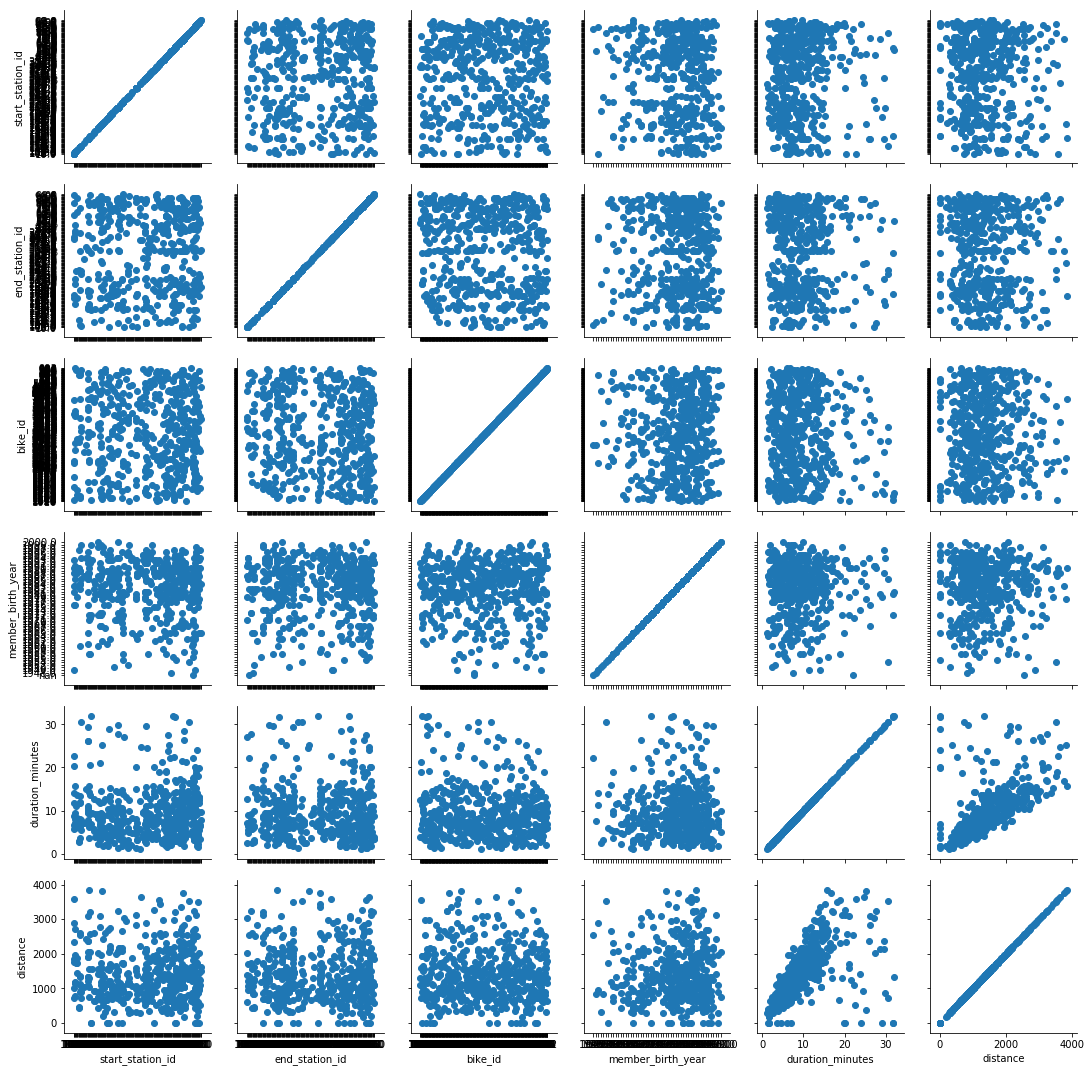

In [108]:
g = sb.PairGrid(data = sample)
g.map(plt.scatter);

__ Conclusion: __ After the data was cleaned duration and distance seem to have a correlation. Another correlation between the data points is not obvious.

<br>
__ Duration and distance plot __

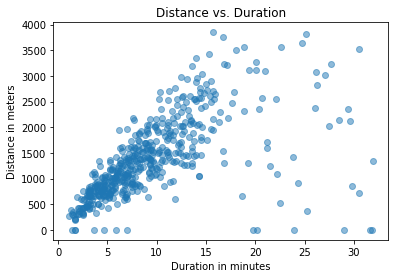

In [109]:
plt.scatter(data = sample, x = 'duration_minutes', y = 'distance', alpha = 1/2)

plt.title('Distance vs. Duration')
plt.xlabel('Duration in minutes')
plt.ylabel('Distance in meters');

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


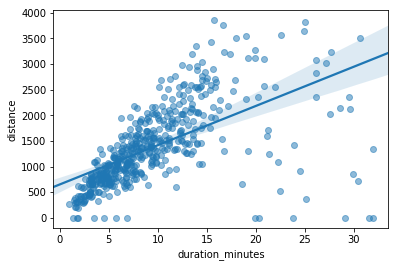

In [110]:
sb.regplot(data = sample, x = 'duration_minutes', y = 'distance', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/2})

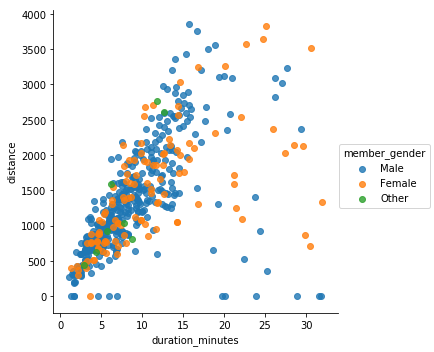

In [111]:
sb.lmplot(x="duration_minutes", y="distance", hue="member_gender", data=sample, fit_reg = False);

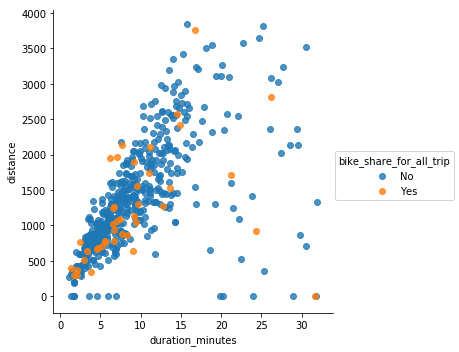

In [112]:
sb.lmplot(x="duration_minutes", y="distance", hue="bike_share_for_all_trip", data=sample, fit_reg = False);

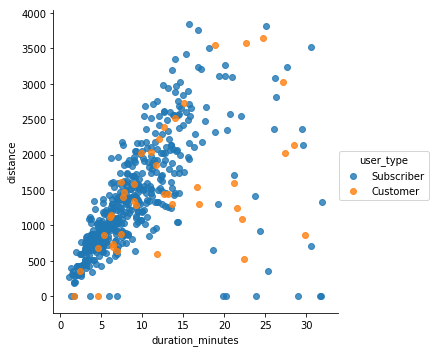

In [113]:
sb.lmplot(x="duration_minutes", y="distance", hue="user_type", data=sample, fit_reg = False);

In [114]:
bin_edges_dis = np.arange(0, dfcc['duration_minutes'].max()+5, 2.4)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


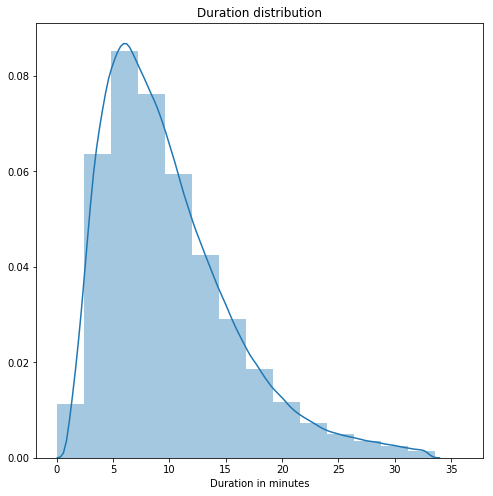

In [115]:
plt.figure(figsize = (8,8))

sb.distplot(dfcc['duration_minutes'], bins = bin_edges_dis, kde = True)

plt.title('Duration distribution')
plt.xlabel('Duration in minutes');